In [24]:
import numpy as np ######## LİNEER REGRASYON ########
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [25]:
data=pd.read_csv('/content/drive/MyDrive/Yüksek lisans Makine Öğrenmesi/Makine öğrenmesi Enes Hoca Notları/a4data.csv',on_bad_lines ='skip',delimiter=';')

data.head(5)


,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,"1250000,00",Audi,A3,A3 Sedan 30 TFSI Dynamic,2019,"83400,00",Yarı Otomatik,Benzin,Sedan,Mavi (metalik),999 cc,116 hp,Önden Çekiş,"4,4 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
1,"1198950,00",Audi,A3,A3 Sedan 1.4 TFSI Ambition,2016,"69800,00",Yarı Otomatik,Benzin,Sedan,Beyaz,1395 cc,150 hp,Önden Çekiş,"4,7 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
2,"945000,00",Audi,A3,A3 Sportback 1.6 TDI Ambition,2013,"191000,00",Otomatik,Dizel,Hatchback/3,Kırmızı,1401 - 1600 cm3,101 - 125 HP,-,-,-,Belirtilmemiş,Takasa Uygun,Galeriden
3,"1120000,00",Audi,A3,A3 Sedan 1.6 TDI Sport Line,2017,"181000,00",Yarı Otomatik,Dizel,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,7 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
4,"1065000,00",Audi,A3,A3 Sedan 1.6 TDI Dynamic,2017,"16200,00",Yarı Otomatik,Dizel,Sedan,Beyaz,1598 cc,116 hp,Önden Çekiş,"3,9 lt",50 lt,"3 değişen, 1 boyalı",Takasa Uygun Değil,Galeriden


In [26]:
data.shape

(732, 18)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fiyat          732 non-null    object
 1   marka          732 non-null    object
 2   seri           732 non-null    object
 3   model          732 non-null    object
 4   yil            732 non-null    int64 
 5   km             732 non-null    object
 6   vites          732 non-null    object
 7   yakit          732 non-null    object
 8   kasa           732 non-null    object
 9   renk           731 non-null    object
 10  motorHacmi     731 non-null    object
 11  motorGucu      731 non-null    object
 12  cekis          732 non-null    object
 13  yakitTuketimi  732 non-null    object
 14  yakitDeposu    732 non-null    object
 15  boyaDegisen    732 non-null    object
 16  takas          732 non-null    object
 17  kimden         732 non-null    object
dtypes: int64(1), object(17)
memory

In [28]:
# DataFrame'deki 'Column1' sütununun veri tipini değiştirelim (int -> float)
data['fiyat'] = data['fiyat'].str.replace(',', '.').astype(float)


In [29]:
x=data.drop(['fiyat','marka','seri','yakitTuketimi','yakitDeposu','cekis','takas','kimden','renk'], axis=1)
y=data['fiyat'].values
x

,model,yil,km,vites,yakit,kasa,motorHacmi,motorGucu,boyaDegisen
0,A3 Sedan 30 TFSI Dynamic,2019,"83400,00",Yarı Otomatik,Benzin,Sedan,999 cc,116 hp,Tamamı orjinal
1,A3 Sedan 1.4 TFSI Ambition,2016,"69800,00",Yarı Otomatik,Benzin,Sedan,1395 cc,150 hp,Tamamı orjinal
2,A3 Sportback 1.6 TDI Ambition,2013,"191000,00",Otomatik,Dizel,Hatchback/3,1401 - 1600 cm3,101 - 125 HP,Belirtilmemiş
3,A3 Sedan 1.6 TDI Sport Line,2017,"181000,00",Yarı Otomatik,Dizel,Sedan,1598 cc,110 hp,Belirtilmemiş
4,A3 Sedan 1.6 TDI Dynamic,2017,"16200,00",Yarı Otomatik,Dizel,Sedan,1598 cc,116 hp,"3 değişen, 1 boyalı"
...,...,...,...,...,...,...,...,...,...
727,A3 Sedan 1.6 TDI Ambition,2014,"120000,00",Yarı Otomatik,Dizel,Sedan,1598 cc,110 hp,Tamamı orjinal
728,A3 Sportback 1.6 Attraction,2010,"145000,00",Düz,LPG & Benzin,Hatchback/3,1595 cc,102 hp,Belirtilmemiş
729,A3 Sportback 1.6 Ambiente,1999,"247000,00",Otomatik,Benzin,Hatchback/3,1595 cc,101 hp,Belirtilmemiş
730,A3 Sportback 1.6 Attraction,2002,"324500,00",Düz,LPG & Benzin,Hatchback/5,1595 cc,101 hp,4 boyalı


In [30]:
data = data[data['boyaDegisen'] != "-"]
data = data[data['motorGucu'] != "-"]
data = data[data['motorHacmi'] != "-"]
data = data[data['kasa'] != "-"]
data = data[data['yakit'] != "-"]
data = data[data['vites'] != "-"]
data = data[data['km'] != "-"]
data = data[data['yil'] != "-"]
data = data[data['model'] != "-"]


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x['model'] = le.fit_transform(x['model'])
x['km'] = le.fit_transform(x['km'])
x['vites'] = le.fit_transform(x['vites'])
x['yakit'] = le.fit_transform(x['yakit'])
x['kasa'] = le.fit_transform(x['kasa'])
x['motorHacmi'] = le.fit_transform(x['motorHacmi'])
x['motorGucu'] = le.fit_transform(x['motorGucu'])
x['boyaDegisen'] = le.fit_transform(x['boyaDegisen'])
data.head()


,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,1250000.0,Audi,A3,A3 Sedan 30 TFSI Dynamic,2019,"83400,00",Yarı Otomatik,Benzin,Sedan,Mavi (metalik),999 cc,116 hp,Önden Çekiş,"4,4 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
1,1198950.0,Audi,A3,A3 Sedan 1.4 TFSI Ambition,2016,"69800,00",Yarı Otomatik,Benzin,Sedan,Beyaz,1395 cc,150 hp,Önden Çekiş,"4,7 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
2,945000.0,Audi,A3,A3 Sportback 1.6 TDI Ambition,2013,"191000,00",Otomatik,Dizel,Hatchback/3,Kırmızı,1401 - 1600 cm3,101 - 125 HP,-,-,-,Belirtilmemiş,Takasa Uygun,Galeriden
3,1120000.0,Audi,A3,A3 Sedan 1.6 TDI Sport Line,2017,"181000,00",Yarı Otomatik,Dizel,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,7 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
4,1065000.0,Audi,A3,A3 Sedan 1.6 TDI Dynamic,2017,"16200,00",Yarı Otomatik,Dizel,Sedan,Beyaz,1598 cc,116 hp,Önden Çekiş,"3,9 lt",50 lt,"3 değişen, 1 boyalı",Takasa Uygun Değil,Galeriden


In [32]:
x

,model,yil,km,vites,yakit,kasa,motorHacmi,motorGucu,boyaDegisen
0,21,2019,355,2,0,8,22,7,53
1,7,2016,335,2,0,8,10,12,53
2,47,2013,150,1,1,4,11,1,49
3,17,2017,135,2,1,8,14,5,49
4,15,2017,103,2,1,8,14,7,31
...,...,...,...,...,...,...,...,...,...
727,12,2014,28,2,1,8,14,5,53
728,39,2010,77,0,3,4,13,3,49
729,37,1999,219,1,0,4,13,2,49
730,39,2002,268,0,3,5,13,2,37


In [ ]:
# df = pd.DataFrame(data)

# # Belirli bir koşulu sağlayan satırları çıkaralım (örneğin, 'Column1' değeri 2 olan satırları)
# data = df[df['fiyat'] <= 10000]

In [33]:
data.shape

(697, 18)

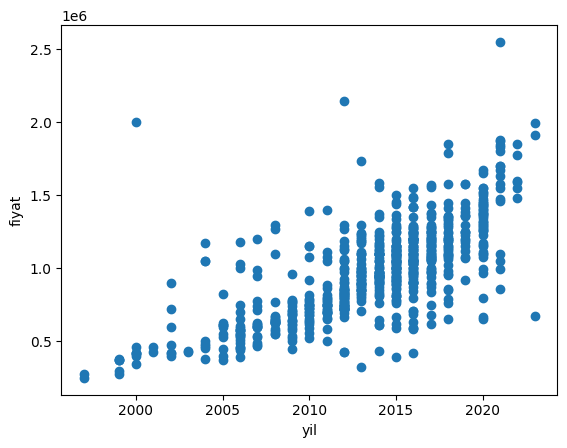

In [34]:
plt.scatter(x['yil'],y)
plt.xlabel('yil')
plt.ylabel('fiyat')
plt.show()

In [37]:
x=np.reshape(x,(732,-1))
y=np.reshape(y,(732,-1))


In [82]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=10)

In [83]:
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
# Label Encoder Auid= 0 vs Vites= 0 manuel, yarıoto 1 tam 2 gibi

LinearRegression()

In [84]:
lin_reg.coef_

array([[  870.96252242, 43798.41646681,    89.09131958,  5672.93881103,
        17279.6286652 , 12823.76130426,  2002.04415846,  5940.29973692,
         1513.9094501 ]])

In [85]:
lin_reg.intercept_

array([-87473253.37592277])

In [86]:
lin_reg.score(X_train,y_train)

0.49889617314832724

In [87]:
lin_reg.score(X_test,y_test)

0.7349777468118277

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Veriyi ölçeklendirme (standartlaştırma)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression modelini oluşturmak ve eğitmek
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Test seti üzerinde tahmin yapmak
y_pred = logreg.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
x

,model,yil,km,vites,yakit,kasa,motorHacmi,motorGucu,boyaDegisen
0,21,2019,355,2,0,8,22,7,53
1,7,2016,335,2,0,8,10,12,53
2,47,2013,150,1,1,4,11,1,49
3,17,2017,135,2,1,8,14,5,49
4,15,2017,103,2,1,8,14,7,31
...,...,...,...,...,...,...,...,...,...
727,12,2014,28,2,1,8,14,5,53
728,39,2010,77,0,3,4,13,3,49
729,37,1999,219,1,0,4,13,2,49
730,39,2002,268,0,3,5,13,2,37


In [21]:
# Yeni bir aracın satış olasılığını tahmin etmek
#le.fit_transform(x['boyaDegisen'])
new_car = [[21,2017,355,2,0,8,22,7,53]]  # model	yil	km	vites	yakit	kasa	motorHacmi	motorGucu	boyaDegisen
new_car_scaled = scaler.transform(new_car)
prediction = logreg.predict_proba(new_car_scaled)[:, 1]

print(f"Yeni aracın satış olasılığı: {prediction[0]}")

Yeni aracın satış olasılığı: 3.7940549666460425e-05


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Ortalama Kare Hatası: 23660597162.361454
Katsayılar: [[ 1087.73720988 44191.10154064   111.86213549  7746.0502973
  28394.54360154 15615.33818918  1846.59465781  6396.25196896
   1612.24673308]]
Sabit: [-88307776.6429589]


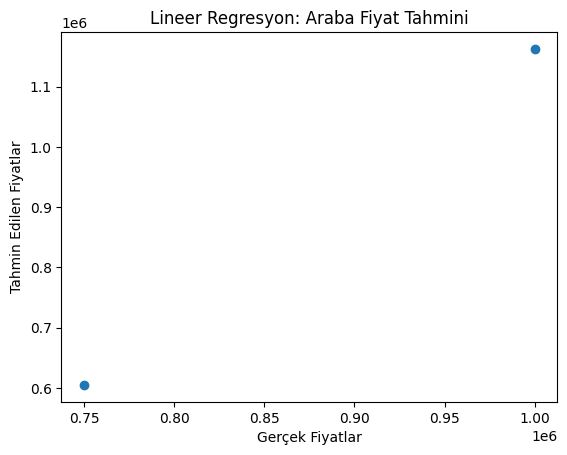

In [22]:
# Gerekli kütüphaneleri içe aktarın
from sklearn.metrics import mean_squared_error

# Test seti üzerinde tahminler yapın
#y_pred = lin_reg.predict(X_test)

# Veriyi eğitim ve test setlerine ayırın
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.002,random_state=50)

# Lineer regresyon modelini oluşturun ve eğitin
model = LinearRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahminler yapın
y_pred = model.predict(X_test)

# Modelin performansını değerlendirin
mse = mean_squared_error(y_test, y_pred)
print(f"Ortalama Kare Hatası: {mse}")

# Katsayıları ve sabiti yazdırın
print("Katsayılar:", lin_reg.coef_)
print("Sabit:", lin_reg.intercept_)

# Gerçek ve tahmin edilen fiyatları karşılaştıran bir grafik çizin
plt.scatter(y_test, y_pred)
plt.xlabel("Gerçek Fiyatlar")
plt.ylabel("Tahmin Edilen Fiyatlar")
plt.title("Lineer Regresyon: Araba Fiyat Tahmini")
plt.show()


In [24]:
corr=data.corr()
corr['fiyat'].sort_values(ascending=False)

<ipython-input-24-1e1f97ad269f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


fiyat    1.000000
yil      0.722271
Name: fiyat, dtype: float64

<Axes: xlabel='yil', ylabel='fiyat'>

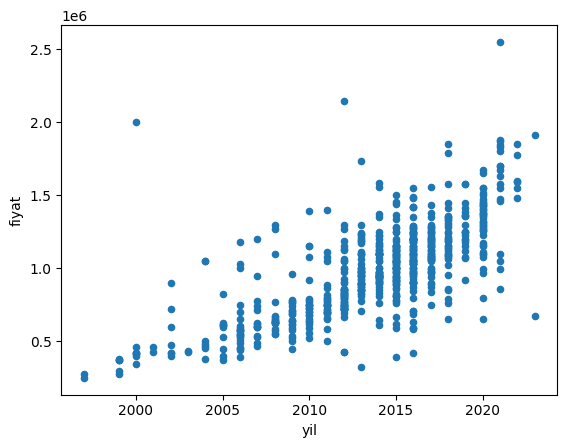

In [26]:
data.plot(kind='scatter',x='yil',y='fiyat')

ValueError: ignored

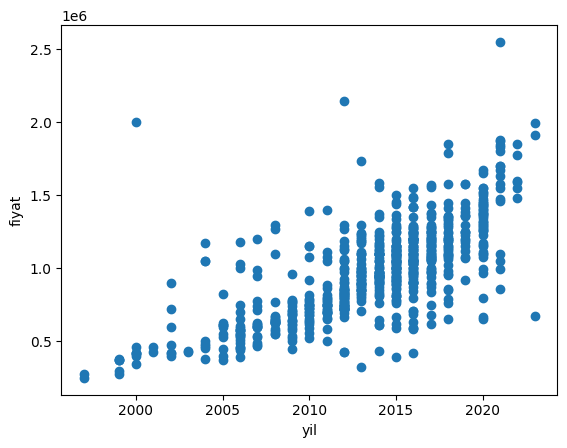

In [126]:
plt.scatter(x['yil'],y)
plt.xlabel('yil')
plt.ylabel('fiyat')
plt.plot(x,lin_reg.coef_*x+lin_reg.intercept_,'r')
plt.show()

In [ ]:
################### LİNEER REGRASYON SONU ######################

In [ ]:
################### METRİCS ####################

In [28]:
from sklearn.metrics import mean_squared_error

pred=model.predict(X_test)
result=mean_squared_error(y_test,pred)
result

23660597162.361454

In [29]:
data.columns

Index(['fiyat', 'marka', 'seri', 'model', 'yil', 'km', 'vites', 'yakit',
       'kasa', 'renk', 'motorHacmi', 'motorGucu', 'cekis', 'yakitTuketimi',
       'yakitDeposu', 'boyaDegisen', 'takas', 'kimden'],
      dtype='object')

In [31]:
x=data['yil']
y=data['fiyat']
x=(x-x.mean())/x.std()
x=np.c_[np.ones(x.shape[0]),x]
x

array([[ 1.        ,  1.11910886],
       [ 1.        ,  0.49275537],
       [ 1.        , -0.13359811],
       ...,
       [ 1.        , -0.7599516 ],
       [ 1.        , -3.05658105],
       [ 1.        , -2.43022757]])

In [32]:
alpha=0.01
iterations=1000
m=y.size
np.random.seed(58)
theta=np.random.rand(2)
print(theta)

def gradient_descent(x,y,theta,iterations,alpha):
    past_cost=[]
    past_thetas=[theta]
    for i in range(iterations):
        prediction=np.dot(x,theta)
        error=prediction-y
        cost=1/(2*m)*np.dot(error.T,error)
        past_cost.append(cost)
        theta=theta-(alpha*(1/m)*np.dot(x.T,error))
        past_thetas.append(theta)
    return past_thetas,past_cost

past_thetas,past_costs=gradient_descent(x,y,theta,iterations,alpha)
theata=past_thetas[-1]

print(theata[0],' ',theata[1])

[0.36510558 0.45120592]
988802.5714514302   230112.63082317964


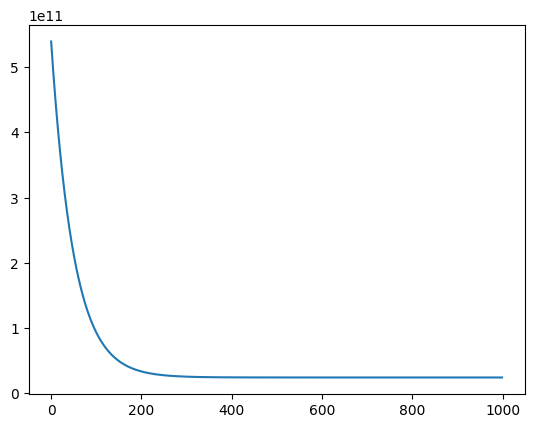

In [33]:
plt.plot(past_costs)
plt.show()

In [34]:
import pandas as pd
import numpy as np

In [55]:
df=pd.read_csv('/content/drive/MyDrive/Yüksek lisans Makine Öğrenmesi/Makine öğrenmesi Enes Hoca Notları/a4data.csv',on_bad_lines ='skip',delimiter=';')

df.head(5)

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,"1250000,00",Audi,A3,A3 Sedan 30 TFSI Dynamic,2019,"83400,00",Yarı Otomatik,Benzin,Sedan,Mavi (metalik),999 cc,116 hp,Önden Çekiş,"4,4 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
1,"1198950,00",Audi,A3,A3 Sedan 1.4 TFSI Ambition,2016,"69800,00",Yarı Otomatik,Benzin,Sedan,Beyaz,1395 cc,150 hp,Önden Çekiş,"4,7 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
2,"945000,00",Audi,A3,A3 Sportback 1.6 TDI Ambition,2013,"191000,00",Otomatik,Dizel,Hatchback/3,Kırmızı,1401 - 1600 cm3,101 - 125 HP,-,-,-,Belirtilmemiş,Takasa Uygun,Galeriden
3,"1120000,00",Audi,A3,A3 Sedan 1.6 TDI Sport Line,2017,"181000,00",Yarı Otomatik,Dizel,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,7 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
4,"1065000,00",Audi,A3,A3 Sedan 1.6 TDI Dynamic,2017,"16200,00",Yarı Otomatik,Dizel,Sedan,Beyaz,1598 cc,116 hp,Önden Çekiş,"3,9 lt",50 lt,"3 değişen, 1 boyalı",Takasa Uygun Değil,Galeriden


In [56]:
df.shape

(732, 18)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fiyat          732 non-null    object
 1   marka          732 non-null    object
 2   seri           732 non-null    object
 3   model          732 non-null    object
 4   yil            732 non-null    int64 
 5   km             732 non-null    object
 6   vites          732 non-null    object
 7   yakit          732 non-null    object
 8   kasa           732 non-null    object
 9   renk           731 non-null    object
 10  motorHacmi     731 non-null    object
 11  motorGucu      731 non-null    object
 12  cekis          732 non-null    object
 13  yakitTuketimi  732 non-null    object
 14  yakitDeposu    732 non-null    object
 15  boyaDegisen    732 non-null    object
 16  takas          732 non-null    object
 17  kimden         732 non-null    object
dtypes: int64(1), object(17)
memory

In [58]:
df.isnull().values.any()

True

In [59]:
df.groupby('vites').mean()

<ipython-input-59-53fbc9e8b2fb>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('vites').mean()


,yil
vites,
Düz,2006.762500
Otomatik,2009.423529
Yarı Otomatik,2015.245150


In [60]:
df['vites'].replace('Düz',0,inplace=True)
df['vites'].replace('Otomatik',1,inplace=True)
df['vites'].replace('Yarı Otomatik',2,inplace=True)

In [61]:
df['fiyat'] = df['fiyat'].str.replace(',', '.').astype(float)
df['km'] = df['km'].str.replace(',', '.').astype(float)

In [62]:
df.head()

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,1250000.0,Audi,A3,A3 Sedan 30 TFSI Dynamic,2019,83400.0,2,Benzin,Sedan,Mavi (metalik),999 cc,116 hp,Önden Çekiş,"4,4 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
1,1198950.0,Audi,A3,A3 Sedan 1.4 TFSI Ambition,2016,69800.0,2,Benzin,Sedan,Beyaz,1395 cc,150 hp,Önden Çekiş,"4,7 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
2,945000.0,Audi,A3,A3 Sportback 1.6 TDI Ambition,2013,191000.0,1,Dizel,Hatchback/3,Kırmızı,1401 - 1600 cm3,101 - 125 HP,-,-,-,Belirtilmemiş,Takasa Uygun,Galeriden
3,1120000.0,Audi,A3,A3 Sedan 1.6 TDI Sport Line,2017,181000.0,2,Dizel,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,7 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
4,1065000.0,Audi,A3,A3 Sedan 1.6 TDI Dynamic,2017,16200.0,2,Dizel,Sedan,Beyaz,1598 cc,116 hp,Önden Çekiş,"3,9 lt",50 lt,"3 değişen, 1 boyalı",Takasa Uygun Değil,Galeriden


In [63]:
X=df[['fiyat','km']]
y=df['vites']

In [64]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=58)

In [66]:
from sklearn.linear_model import LogisticRegression

lg=LogisticRegression()

model=lg.fit(X_train,y_train)

In [67]:
model.coef_

array([[-1.66889908e-06,  3.22589298e-06],
       [-6.23064671e-07,  9.40670274e-07],
       [ 2.29196375e-06, -4.16656326e-06]])

In [68]:
model.score(X_test,y_test)

0.782312925170068

In [69]:
model.score(X_train,y_train)

0.8034188034188035

In [70]:
from sklearn.metrics import confusion_matrix,recall_score,classification_report

pred=model.predict(X_test)

confusion_matrix(y_test,pred)

array([[  3,   0,  15],
       [  2,   0,  14],
       [  1,   0, 112]])

In [ ]:
recall_score(y_test,pred)

In [77]:
112/(112+1)

0.9911504424778761

In [73]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.50      0.17      0.25        18
           1       0.00      0.00      0.00        16
           2       0.79      0.99      0.88       113

    accuracy                           0.78       147
   macro avg       0.43      0.39      0.38       147
weighted avg       0.67      0.78      0.71       147



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [74]:
pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [75]:
model.predict([[85,165]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
################### confusion_matrix ###############

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Yüksek lisans Makine Öğrenmesi/Makine öğrenmesi Enes Hoca Notları/a4data.csv',on_bad_lines ='skip',delimiter=';')

df.head(5)

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,"1250000,00",Audi,A3,A3 Sedan 30 TFSI Dynamic,2019,"83400,00",Yarı Otomatik,Benzin,Sedan,Mavi (metalik),999 cc,116 hp,Önden Çekiş,"4,4 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
1,"1198950,00",Audi,A3,A3 Sedan 1.4 TFSI Ambition,2016,"69800,00",Yarı Otomatik,Benzin,Sedan,Beyaz,1395 cc,150 hp,Önden Çekiş,"4,7 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
2,"945000,00",Audi,A3,A3 Sportback 1.6 TDI Ambition,2013,"191000,00",Otomatik,Dizel,Hatchback/3,Kırmızı,1401 - 1600 cm3,101 - 125 HP,-,-,-,Belirtilmemiş,Takasa Uygun,Galeriden
3,"1120000,00",Audi,A3,A3 Sedan 1.6 TDI Sport Line,2017,"181000,00",Yarı Otomatik,Dizel,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,7 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
4,"1065000,00",Audi,A3,A3 Sedan 1.6 TDI Dynamic,2017,"16200,00",Yarı Otomatik,Dizel,Sedan,Beyaz,1598 cc,116 hp,Önden Çekiş,"3,9 lt",50 lt,"3 değişen, 1 boyalı",Takasa Uygun Değil,Galeriden


In [4]:
df.shape

(732, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   fiyat          732 non-null    object
 1   marka          732 non-null    object
 2   seri           732 non-null    object
 3   model          732 non-null    object
 4   yil            732 non-null    int64 
 5   km             732 non-null    object
 6   vites          732 non-null    object
 7   yakit          732 non-null    object
 8   kasa           732 non-null    object
 9   renk           731 non-null    object
 10  motorHacmi     731 non-null    object
 11  motorGucu      731 non-null    object
 12  cekis          732 non-null    object
 13  yakitTuketimi  732 non-null    object
 14  yakitDeposu    732 non-null    object
 15  boyaDegisen    732 non-null    object
 16  takas          732 non-null    object
 17  kimden         732 non-null    object
dtypes: int64(1), object(17)
memory

In [6]:
df.groupby('yakit').mean()

<ipython-input-6-3323f8761700>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('yakit').mean()


,yil
yakit,
Benzin,2013.696262
Dizel,2015.048193
Hibrit,2021.571429
LPG & Benzin,2005.707865


In [7]:
df['yakit'].replace('Benzin',0,inplace=True)
df['yakit'].replace('Dizel',1,inplace=True)
df['yakit'].replace('Hibrit',2,inplace=True)
df['yakit'].replace('LPG & Benzin',3,inplace=True)

<Axes: xlabel='yakit', ylabel='count'>

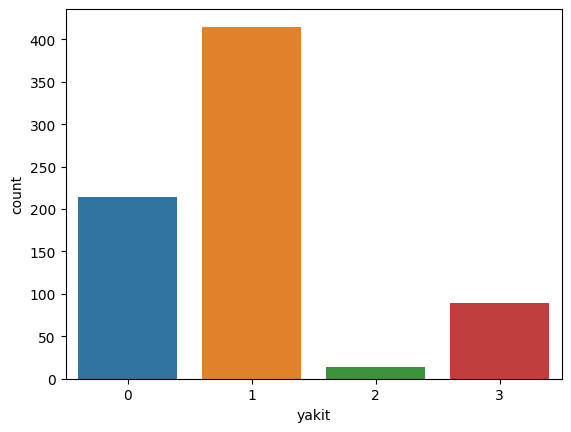

In [8]:
sns.countplot(x='yakit',data=df)

<Axes: xlabel='yil', ylabel='Count'>

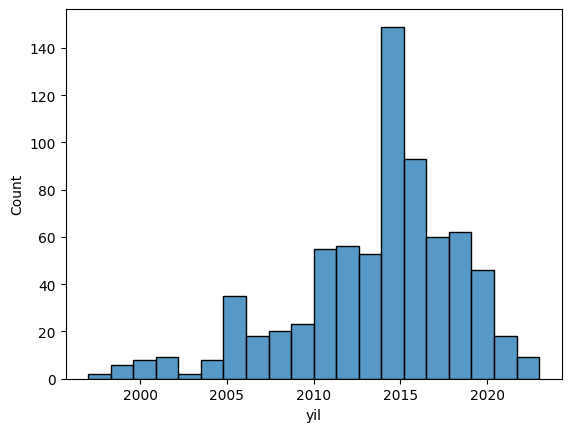

In [9]:
sns.histplot(df['yil'])

In [10]:
df['fiyat'] = df['fiyat'].str.replace(',', '.').astype(float)
df['km'] = df['km'].str.replace(',', '.').astype(float)
df['vites'] = df['vites'].str.replace(',', '.')
df['kasa'] = df['kasa'].str.replace(',', '.')
df['motorHacmi'] = df['motorHacmi'].str.replace(',', '.')
df['motorGucu'] = df['motorGucu'].str.replace(',', '.')
df['boyaDegisen'] = df['boyaDegisen'].str.replace(',', '.')

In [11]:
x=df.drop(['yakit','marka','seri','yakitTuketimi','yakitDeposu','cekis','takas','kimden','renk'], axis=1)

y=df['yakit']
x

,fiyat,model,yil,km,vites,kasa,motorHacmi,motorGucu,boyaDegisen
0,1250000.0,A3 Sedan 30 TFSI Dynamic,2019,83400.0,Yarı Otomatik,Sedan,999 cc,116 hp,Tamamı orjinal
1,1198950.0,A3 Sedan 1.4 TFSI Ambition,2016,69800.0,Yarı Otomatik,Sedan,1395 cc,150 hp,Tamamı orjinal
2,945000.0,A3 Sportback 1.6 TDI Ambition,2013,191000.0,Otomatik,Hatchback/3,1401 - 1600 cm3,101 - 125 HP,Belirtilmemiş
3,1120000.0,A3 Sedan 1.6 TDI Sport Line,2017,181000.0,Yarı Otomatik,Sedan,1598 cc,110 hp,Belirtilmemiş
4,1065000.0,A3 Sedan 1.6 TDI Dynamic,2017,16200.0,Yarı Otomatik,Sedan,1598 cc,116 hp,3 değişen. 1 boyalı
...,...,...,...,...,...,...,...,...,...
727,1250000.0,A3 Sedan 1.6 TDI Ambition,2014,120000.0,Yarı Otomatik,Sedan,1598 cc,110 hp,Tamamı orjinal
728,728000.0,A3 Sportback 1.6 Attraction,2010,145000.0,Düz,Hatchback/3,1595 cc,102 hp,Belirtilmemiş
729,380000.0,A3 Sportback 1.6 Ambiente,1999,247000.0,Otomatik,Hatchback/3,1595 cc,101 hp,Belirtilmemiş
730,400000.0,A3 Sportback 1.6 Attraction,2002,324500.0,Düz,Hatchback/5,1595 cc,101 hp,4 boyalı


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x['fiyat'] = le.fit_transform(x['fiyat'])
x['yil'] = le.fit_transform(x['yil'])
x['model'] = le.fit_transform(x['model'])
x['km'] = le.fit_transform(x['km'])
x['vites'] = le.fit_transform(x['vites'])
x['kasa'] = le.fit_transform(x['kasa'])
x['motorHacmi'] = le.fit_transform(x['motorHacmi'])
x['motorGucu'] = le.fit_transform(x['motorGucu'])
x['boyaDegisen'] = le.fit_transform(x['boyaDegisen'])
df.head()

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,1250000.0,Audi,A3,A3 Sedan 30 TFSI Dynamic,2019,83400.0,Yarı Otomatik,0,Sedan,Mavi (metalik),999 cc,116 hp,Önden Çekiş,"4,4 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
1,1198950.0,Audi,A3,A3 Sedan 1.4 TFSI Ambition,2016,69800.0,Yarı Otomatik,0,Sedan,Beyaz,1395 cc,150 hp,Önden Çekiş,"4,7 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
2,945000.0,Audi,A3,A3 Sportback 1.6 TDI Ambition,2013,191000.0,Otomatik,1,Hatchback/3,Kırmızı,1401 - 1600 cm3,101 - 125 HP,-,-,-,Belirtilmemiş,Takasa Uygun,Galeriden
3,1120000.0,Audi,A3,A3 Sedan 1.6 TDI Sport Line,2017,181000.0,Yarı Otomatik,1,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,7 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
4,1065000.0,Audi,A3,A3 Sedan 1.6 TDI Dynamic,2017,16200.0,Yarı Otomatik,1,Sedan,Beyaz,1598 cc,116 hp,Önden Çekiş,"3,9 lt",50 lt,3 değişen. 1 boyalı,Takasa Uygun Değil,Galeriden


In [13]:
x

,fiyat,model,yil,km,vites,kasa,motorHacmi,motorGucu,boyaDegisen
0,270,21,21,97,2,8,22,7,53
1,252,7,18,78,2,8,10,12,53
2,159,47,15,268,1,4,11,1,49
3,228,17,19,254,2,8,14,5,49
4,208,15,19,7,2,8,14,7,31
...,...,...,...,...,...,...,...,...,...
727,270,12,16,153,2,8,14,5,53
728,92,39,12,200,0,4,13,3,49
729,8,37,1,330,1,4,13,2,49
730,12,39,4,370,0,5,13,2,37


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [15]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [16]:
logreg.coef_

array([[-1.03097833e-03, -3.16750256e-02, -1.62103302e-01,
         9.11981095e-03, -5.21614823e-01, -9.09887310e-02,
         9.26507284e-02,  4.39994729e-01,  9.56715602e-03],
       [ 2.78720541e-03, -1.66966165e-02,  1.53277415e-01,
         1.44084355e-02,  1.96840984e+00,  3.37428855e-01,
        -5.95838874e-02, -5.02110029e-01, -2.80549819e-03],
       [-8.24708618e-03, -2.56798842e-02,  4.19072618e-01,
        -4.95301256e-02, -7.13649221e-01,  1.83643760e-01,
         1.48926436e-02, -1.49942270e-01, -1.62792838e-02],
       [ 6.49085910e-03,  7.40515264e-02, -4.10246731e-01,
         2.60018792e-02, -7.33145800e-01, -4.30083884e-01,
        -4.79594846e-02,  2.12057570e-01,  9.51762596e-03]])

In [17]:
logreg.intercept_

array([ 2.86991051, -2.58435073, -0.45227143,  0.16671165])

In [18]:
pred=logreg.predict(X_test)

In [19]:
pred

array([1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 3,
       1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       3, 1, 1, 0, 1, 3, 1, 1, 3, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 3, 1,
       1, 0, 0, 1, 3, 1, 3, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 3, 1, 0, 0, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 3, 0,
       0, 0, 1, 1, 1, 1, 0, 3, 1, 1, 1, 3, 0, 1, 1])

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,pred)

array([[36,  2,  0,  6],
       [ 4, 82,  0,  2],
       [ 1,  0,  0,  0],
       [ 2,  1,  0, 11]])

In [21]:
from sklearn.metrics import plot_confusion_matrix

confusion_matrix(logreg,X_test,y_test,display_labels=["(0) Benzin", "(1) Dizel","(2) Hibrit", "(3) LPG & Benzin"],cmap=plt.cm.Blues)

ImportError: ignored

In [22]:
pip show scikit-learn

Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: bigframes, fastai, imbalanced-learn, librosa, mlxtend, qudida, sklearn-pandas, yellowbrick


In [26]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 17.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred,digits=4))

              precision    recall  f1-score   support

           0     0.8372    0.8182    0.8276        44
           1     0.9647    0.9318    0.9480        88
           2     0.0000    0.0000    0.0000         1
           3     0.5789    0.7857    0.6667        14

    accuracy                         0.8776       147
   macro avg     0.5952    0.6339    0.6106       147
weighted avg     0.8832    0.8776    0.8787       147



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [248]:
!pip install scikit-learn

In [241]:
from sklearn.metrics import recall_score,f1_score,accuracy_score

print(recall_score(y_test,pred))
print(f1_score(y_test,pred))
print(accuracy_score(y_test,pred))

ValueError: ignored

In [242]:
logreg.score(X_test,y_test)

0.8639455782312925

In [243]:
logreg.score(X_train,y_train)

0.8683760683760684

In [ ]:
################################## KNN ####################################

In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [109]:
df=pd.read_csv('/content/drive/MyDrive/Yüksek lisans Makine Öğrenmesi/Makine öğrenmesi Enes Hoca Notları/a4data.csv',on_bad_lines ='skip',delimiter=';')

df.head(5)

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,"1250000,00",Audi,A3,A3 Sedan 30 TFSI Dynamic,2019,"83400,00",Yarı Otomatik,Benzin,Sedan,Mavi (metalik),999 cc,116 hp,Önden Çekiş,"4,4 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
1,"1198950,00",Audi,A3,A3 Sedan 1.4 TFSI Ambition,2016,"69800,00",Yarı Otomatik,Benzin,Sedan,Beyaz,1395 cc,150 hp,Önden Çekiş,"4,7 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
2,"945000,00",Audi,A3,A3 Sportback 1.6 TDI Ambition,2013,"191000,00",Otomatik,Dizel,Hatchback/3,Kırmızı,1401 - 1600 cm3,101 - 125 HP,-,-,-,Belirtilmemiş,Takasa Uygun,Galeriden
3,"1120000,00",Audi,A3,A3 Sedan 1.6 TDI Sport Line,2017,"181000,00",Yarı Otomatik,Dizel,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,7 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
4,"1065000,00",Audi,A3,A3 Sedan 1.6 TDI Dynamic,2017,"16200,00",Yarı Otomatik,Dizel,Sedan,Beyaz,1598 cc,116 hp,Önden Çekiş,"3,9 lt",50 lt,"3 değişen, 1 boyalı",Takasa Uygun Değil,Galeriden


In [110]:
df.groupby('yakit').mean()

<ipython-input-110-3323f8761700>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('yakit').mean()


,yil
yakit,
Benzin,2013.696262
Dizel,2015.048193
Hibrit,2021.571429
LPG & Benzin,2005.707865


In [111]:
df['yakit'].replace('Benzin',0,inplace=True)
df['yakit'].replace('Dizel',1,inplace=True)
df['yakit'].replace('Hibrit',2,inplace=True)
df['yakit'].replace('LPG & Benzin',3,inplace=True)

In [112]:
df = df[df['boyaDegisen'] != "-"]
df = df[df['motorGucu'] != "-"]
df = df[df['motorHacmi'] != "-"]
df = df[df['kasa'] != "-"]
df = df[df['yakit'] != "-"]
df = df[df['vites'] != "-"]
df = df[df['km'] != "-"]
df = df[df['yil'] != "-"]
df = df[df['model'] != "-"]

In [113]:
x=df.drop(['yakit','marka','seri','yakitTuketimi','yakitDeposu','cekis','takas','kimden','renk'], axis=1)

y=df['yakit']


In [115]:
df.shape

(697, 9)

In [116]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x['fiyat'] = le.fit_transform(x['fiyat'])
x['yil'] = le.fit_transform(x['yil'])
x['model'] = le.fit_transform(x['model'])
x['km'] = le.fit_transform(x['km'])
x['vites'] = le.fit_transform(x['vites'])
x['kasa'] = le.fit_transform(x['kasa'])
x['motorHacmi'] = le.fit_transform(x['motorHacmi'])
x['motorGucu'] = le.fit_transform(x['motorGucu'])
x['boyaDegisen'] = le.fit_transform(x['boyaDegisen'])
df.head()

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,"1250000,00",Audi,A3,A3 Sedan 30 TFSI Dynamic,2019,"83400,00",Yarı Otomatik,0,Sedan,Mavi (metalik),999 cc,116 hp,Önden Çekiş,"4,4 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
1,"1198950,00",Audi,A3,A3 Sedan 1.4 TFSI Ambition,2016,"69800,00",Yarı Otomatik,0,Sedan,Beyaz,1395 cc,150 hp,Önden Çekiş,"4,7 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
2,"945000,00",Audi,A3,A3 Sportback 1.6 TDI Ambition,2013,"191000,00",Otomatik,1,Hatchback/3,Kırmızı,1401 - 1600 cm3,101 - 125 HP,-,-,-,Belirtilmemiş,Takasa Uygun,Galeriden
3,"1120000,00",Audi,A3,A3 Sedan 1.6 TDI Sport Line,2017,"181000,00",Yarı Otomatik,1,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,7 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
4,"1065000,00",Audi,A3,A3 Sedan 1.6 TDI Dynamic,2017,"16200,00",Yarı Otomatik,1,Sedan,Beyaz,1598 cc,116 hp,Önden Çekiş,"3,9 lt",50 lt,"3 değişen, 1 boyalı",Takasa Uygun Değil,Galeriden


In [142]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=1)

In [143]:
X_train.shape

(627, 9)

In [144]:
import math
k=math.sqrt(len(x))
knn=KNeighborsClassifier(n_neighbors=27,metric='euclidean')
knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=27)

In [145]:
knn.score(X_test,y_test)

0.7

In [146]:
knn.score(X_train,y_train)

0.7113237639553429

In [147]:
y_pred=knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[12,  7,  0,  1],
       [ 7, 33,  0,  2],
       [ 0,  0,  0,  1],
       [ 2,  1,  0,  4]])

In [148]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.60      0.59        20
           1       0.80      0.79      0.80        42
           2       0.00      0.00      0.00         1
           3       0.50      0.57      0.53         7

    accuracy                           0.70        70
   macro avg       0.47      0.49      0.48        70
weighted avg       0.70      0.70      0.70        70



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
for k in range(3,101,2):
    knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train,y_train)
    print("k:",k," Score:",knn.score(X_test,y_test))

k: 3  Score: 0.6571428571428571
k: 5  Score: 0.6285714285714286
k: 7  Score: 0.5714285714285714
k: 9  Score: 0.6285714285714286
k: 11  Score: 0.6857142857142857
k: 13  Score: 0.7142857142857143
k: 15  Score: 0.6857142857142857
k: 17  Score: 0.6714285714285714
k: 19  Score: 0.7
k: 21  Score: 0.6857142857142857
k: 23  Score: 0.6857142857142857
k: 25  Score: 0.7142857142857143
k: 27  Score: 0.7
k: 29  Score: 0.6857142857142857
k: 31  Score: 0.6857142857142857
k: 33  Score: 0.6857142857142857
k: 35  Score: 0.7571428571428571
k: 37  Score: 0.7285714285714285
k: 39  Score: 0.7571428571428571
k: 41  Score: 0.7428571428571429
k: 43  Score: 0.7428571428571429
k: 45  Score: 0.7285714285714285
k: 47  Score: 0.7142857142857143
k: 49  Score: 0.7
k: 51  Score: 0.6857142857142857
k: 53  Score: 0.6857142857142857
k: 55  Score: 0.6714285714285714
k: 57  Score: 0.6571428571428571
k: 59  Score: 0.6714285714285714
k: 61  Score: 0.6571428571428571
k: 63  Score: 0.6428571428571429
k: 65  Score: 0.6285714285

In [150]:
y_pred

array([3, 3, 1, 0, 1, 0, 1, 0, 0, 1, 3, 1, 0, 3, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 3, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 3, 1, 0, 0, 3, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 3, 1,
       1, 0, 1, 0])

In [154]:
x=df.drop('yakit',axis=1)
y=df['yakit']
x.shape

(697, 17)

In [169]:
from sklearn.preprocessing import LabelEncoder

x=df.drop(['yakit','marka','seri','yakitTuketimi','yakitDeposu','cekis','takas','kimden','renk'], axis=1)

y=df['yakit']

le = LabelEncoder()
x['fiyat'] = le.fit_transform(x['fiyat'])
x['yil'] = le.fit_transform(x['yil'])
x['model'] = le.fit_transform(x['model'])
x['km'] = le.fit_transform(x['km'])
x['vites'] = le.fit_transform(x['vites'])
x['kasa'] = le.fit_transform(x['kasa'])
x['motorHacmi'] = le.fit_transform(x['motorHacmi'])
x['motorGucu'] = le.fit_transform(x['motorGucu'])
x['boyaDegisen'] = le.fit_transform(x['boyaDegisen'])
df.head()

,fiyat,marka,seri,model,yil,km,vites,yakit,kasa,renk,motorHacmi,motorGucu,cekis,yakitTuketimi,yakitDeposu,boyaDegisen,takas,kimden
0,"1250000,00",Audi,A3,A3 Sedan 30 TFSI Dynamic,2019,"83400,00",Yarı Otomatik,0,Sedan,Mavi (metalik),999 cc,116 hp,Önden Çekiş,"4,4 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
1,"1198950,00",Audi,A3,A3 Sedan 1.4 TFSI Ambition,2016,"69800,00",Yarı Otomatik,0,Sedan,Beyaz,1395 cc,150 hp,Önden Çekiş,"4,7 lt",50 lt,Tamamı orjinal,Takasa Uygun,Galeriden
2,"945000,00",Audi,A3,A3 Sportback 1.6 TDI Ambition,2013,"191000,00",Otomatik,1,Hatchback/3,Kırmızı,1401 - 1600 cm3,101 - 125 HP,-,-,-,Belirtilmemiş,Takasa Uygun,Galeriden
3,"1120000,00",Audi,A3,A3 Sedan 1.6 TDI Sport Line,2017,"181000,00",Yarı Otomatik,1,Sedan,Siyah,1598 cc,110 hp,Önden Çekiş,"3,7 lt",50 lt,Belirtilmemiş,Takasa Uygun,Galeriden
4,"1065000,00",Audi,A3,A3 Sedan 1.6 TDI Dynamic,2017,"16200,00",Yarı Otomatik,1,Sedan,Beyaz,1598 cc,116 hp,Önden Çekiş,"3,9 lt",50 lt,"3 değişen, 1 boyalı",Takasa Uygun Değil,Galeriden


In [170]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [171]:
for k in range(3,101,2):
    knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    knn.fit(X_train,y_train)
    print("k:",k," Score:",knn.score(X_test,y_test))

k: 3  Score: 0.6
k: 5  Score: 0.6357142857142857
k: 7  Score: 0.6428571428571429
k: 9  Score: 0.6571428571428571
k: 11  Score: 0.6928571428571428
k: 13  Score: 0.6714285714285714
k: 15  Score: 0.65
k: 17  Score: 0.7
k: 19  Score: 0.6928571428571428
k: 21  Score: 0.6928571428571428
k: 23  Score: 0.6928571428571428
k: 25  Score: 0.6928571428571428
k: 27  Score: 0.6785714285714286
k: 29  Score: 0.6928571428571428
k: 31  Score: 0.6857142857142857
k: 33  Score: 0.6857142857142857
k: 35  Score: 0.6857142857142857
k: 37  Score: 0.7071428571428572
k: 39  Score: 0.7
k: 41  Score: 0.6785714285714286
k: 43  Score: 0.7
k: 45  Score: 0.7071428571428572
k: 47  Score: 0.6857142857142857
k: 49  Score: 0.7
k: 51  Score: 0.6857142857142857
k: 53  Score: 0.6714285714285714
k: 55  Score: 0.6785714285714286
k: 57  Score: 0.6571428571428571
k: 59  Score: 0.6571428571428571
k: 61  Score: 0.65
k: 63  Score: 0.65
k: 65  Score: 0.6428571428571429
k: 67  Score: 0.6357142857142857
k: 69  Score: 0.65
k: 71  Score:

In [172]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [173]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.45      0.45      0.45        42
           1       0.71      0.71      0.71        80
           2       1.00      1.00      1.00         1
           3       0.41      0.41      0.41        17

    accuracy                           0.60       140
   macro avg       0.64      0.64      0.64       140
weighted avg       0.60      0.60      0.60       140



In [176]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
cv=KFold(n_splits=3,random_state=1,shuffle=True)

knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')

scores=cross_val_score(knn,x,y,scoring='recall',cv=cv)

print(np.mean(scores))

nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 2098, in recall_score
    _, r, _, _ = precision_recall_fscore_support(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 1573, in precision_recall_fscore_support
    labels = _check_set_wise_labels(y_true, y_pred, average, labels, pos_label)
  File "/usr/local/lib/python3.10/dist-packages/sklea

In [177]:
print(scores)

[nan nan nan]


In [179]:
pred=cross_val_predict(knn,x,y,cv=cv)

In [180]:
pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 3, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 3, 1, 0, 1, 0, 3, 1, 3, 1, 1,
       1, 1, 0, 3, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 3, 1, 0, 3, 0, 0, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 3, 1, 1, 0, 3, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 3, 0, 3, 1, 3, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 3, 1, 0, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 0, 1, 0, 1,
       3, 1, 1, 1, 1, 0, 1, 0, 3, 0, 1, 3, 1, 1, 2, 0, 1, 3, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 3, 3, 0, 3, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 0,

In [181]:
from sklearn.model_selection import GridSearchCV

log=LogisticRegression(max_iter=200)

pram_grid={
    'C':[0.001,0.01,0.1,1,10,100],
    'penalty':['l1','l2'],

}
grid_search=GridSearchCV(log,pram_grid,cv=5,scoring='accuracy')
results=grid_search.fit(X_train,y_train)
print(results.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': 1, 'penalty': 'l2'}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [182]:
from sklearn.linear_model import LogisticRegression

log=LogisticRegression(max_iter=300,C=0.01,penalty='l2')
log.fit(X_train,y_train)
y_pred=log.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84        42
           1       0.85      0.99      0.91        80
           2       0.00      0.00      0.00         1
           3       0.69      0.53      0.60        17

    accuracy                           0.86       140
   macro avg       0.62      0.57      0.59       140
weighted avg       0.85      0.86      0.85       140



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [183]:
knn=KNeighborsClassifier()
param_grid={
    'n_neighbors':np.arange(1,50),
    'weights':['uniform', 'distance'],
    'metric':['euclidean','cosine','infinity'],
}
grid_search=GridSearchCV(knn,param_grid,cv=5)
result=grid_search.fit(X_train,y_train)
print(result.best_params_)

{'metric': 'euclidean', 'n_neighbors': 23, 'weights': 'distance'}


In [184]:
math.sqrt(len(x))

26.40075756488817

In [185]:
knn=KNeighborsClassifier(n_neighbors=29,metric='euclidean',weights='distance')
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.60      0.50      0.55        42
           1       0.80      0.84      0.82        80
           2       0.00      0.00      0.00         1
           3       0.52      0.65      0.58        17

    accuracy                           0.71       140
   macro avg       0.48      0.50      0.49       140
weighted avg       0.70      0.71      0.70       140



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
